In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as sc
import sympy as sp

In [2]:
datos = "../data/FluidosPerfo.csv"
flu = pd.read_csv(datos, skiprows=[0,1], index_col=0)
r = np.array(flu.index)
t = np.array(flu.TAU)


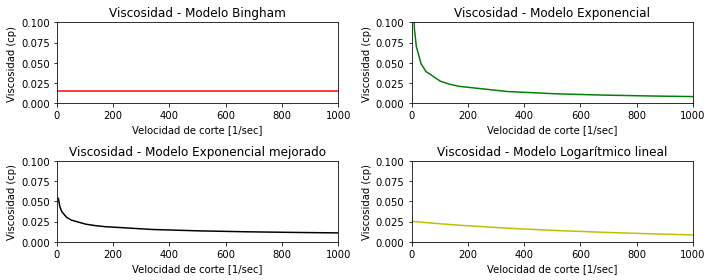

In [3]:
x, y = sp.symbols('x y')

fig = plt.figure(figsize=(10,4))

#Bingham
mBin = sp.diff(.0154*x + 3.64, x)
ax0 = plt.subplot2grid((2,2), loc=(0,0))
ax0.axhline(y=mBin, color ="r", xmin=0, xmax=10000)
ax0.set_title("Viscosidad - Modelo Bingham")

#Exponencial
mexpo = sp.diff(0.66*x**0.473, x)
expo = (0.31218/(r**0.527))
ax1 = plt.subplot2grid((2,2), loc=(0,1))
ax1.plot(r,expo, "g")
ax1.set_title("Viscosidad - Modelo Exponencial")

#Exponencial mejorado
x, y = sp.symbols('x y')
mexpom = sp.diff(2.4 + 0.125*(x**0.700), x)
expom = (0.0875/(r**0.3))
ax2 = plt.subplot2grid((2,2), loc=(1,0))
ax2.plot(r,expom, "k")
ax2.set_title("Viscosidad - Modelo Exponencial mejorado")

#Logarítmico
x, y = sp.symbols('x y')
mlog = sp.diff((-8.425e-06*0.00099*x + (8.425e-06 + 0.0254*0.00099)*sp.log((1+0.00099*x)**2)/2)/0.00099**2 +2.945, x)
log = (17.126*(1.9602*(10**-6)*r+0.00198))/((0.00099*r+1)**2)-0.00851
ax3 = plt.subplot2grid((2,2), loc=(1,1))
ax3.plot(r,log, "y")
ax3.set_title("Viscosidad - Modelo Logarítmico lineal")


ax0.set_ylim(bottom=0, top=0.1)
ax1.set_ylim(bottom=0, top=0.1)
ax2.set_ylim(bottom=0, top=0.1)
ax3.set_ylim(bottom=0, top=0.1)


ax0.set_xlim(left=0, right=1000)
ax1.set_xlim(left=0, right=1000)
ax2.set_xlim(left=0, right=1000)
ax3.set_xlim(left=0, right=1000)

ax0.set_ylabel("Viscosidad (cp)")
ax0.set_xlabel("Velocidad de corte [1/sec]")

ax1.set_ylabel("Viscosidad (cp)")
ax1.set_xlabel("Velocidad de corte [1/sec]")

ax2.set_ylabel("Viscosidad (cp)")
ax2.set_xlabel("Velocidad de corte [1/sec]")

ax3.set_ylabel("Viscosidad (cp)")
ax3.set_xlabel("Velocidad de corte [1/sec]")



plt.tight_layout()
plt.savefig("../results/Grafica_viscosidad_individuales.png")

In [ ]:
plt.axhline(y=mBin, xmin=0, xmax=1000, label="Bingham")
plt.plot(r,expo, "k", label="Exponencial")
plt.plot(r,expom, "g", label="Exponencial mejorado")
plt.plot(r,log, "y", label="logarítmico lineal")
plt.legend()
plt.xlabel("Velocidad de corte [1/sec]")
plt.ylabel("Viscosidad (cp)")
plt.ylim(0, 0.06)

plt.savefig("../results/Grafica_viscosidad_juntos.png")